# 导入必要库

In [1]:
from pathlib import Path
import gc
import time

from core import RLEnv
from core.agent import BaseAgent
from greedy import (
    EpsilonDecreasingConfig,
    GreedyAgent,
    greedy_average,
    epsilon_average,
    epsilon_decreasing_average,
)
from ucb1 import UCBAgent, ucb1

from train import batch_train
from utils import plot_metrics_history, save_experiment_data, ProcessDataLogger

In [2]:
STEPS: int = 100_000
GRID_SIZE: int = 500

SEED: int = 42
MACHINE_COUNT: int = 10
COUNT: int = 50
CONVERGENCE_THRESHOLD: float = 0.9
CONVERGENCE_MIN_STEPS: int = 1000
OPTIMISTIC_TIMES: int = 1
ENABLE_OPTIMISTIC: bool = True
EXPERIMENT_DATA_DIR: Path = Path.cwd() / "experiment_data"

ENV: RLEnv = RLEnv(machine_count=MACHINE_COUNT, seed=SEED)
EPSILON_CONFIG: EpsilonDecreasingConfig = EpsilonDecreasingConfig()

# 工厂函数

In [3]:
def get_run_id(agent_name: str) -> str:
    return agent_name + str(time.time())

In [4]:
def create_greedy_agent(
    env: RLEnv, 
    epsilon_config: EpsilonDecreasingConfig, 
    optimistic_init: bool, 
    optimistic_times: int,
    convergence_threshold: float,
    convergence_min_steps: int,
    seed: int,
) -> BaseAgent:
    return GreedyAgent(
        name=greedy_average.__name__,
        env=env,
        greedy_algorithm=greedy_average,
        epsilon_config=epsilon_config,
        optimistic_init=optimistic_init,
        optimistic_times=optimistic_times,
        convergence_threshold=convergence_threshold,
        convergence_min_steps=convergence_min_steps,
        seed=seed,
    )

def create_epsilon_agent(
    env: RLEnv, 
    epsilon_config: EpsilonDecreasingConfig, 
    optimistic_init: bool, 
    optimistic_times: int,
    convergence_threshold: float,
    convergence_min_steps: int,
    seed: int,
) -> BaseAgent:
    return GreedyAgent(
        name=epsilon_average.__name__,
        env=env,
        greedy_algorithm=epsilon_average,
        epsilon_config=epsilon_config,
        optimistic_init=optimistic_init,
        optimistic_times=optimistic_times,
        convergence_threshold=convergence_threshold,
        convergence_min_steps=convergence_min_steps,
        seed=seed,
    )

def create_decreasing_agent(
    env: RLEnv, 
    epsilon_config: EpsilonDecreasingConfig, 
    optimistic_init: bool, 
    optimistic_times: int,
    convergence_threshold: float,
    convergence_min_steps: int,
    seed: int,
) -> BaseAgent:
    return GreedyAgent(
        name=epsilon_decreasing_average.__name__,
        env=env,
        greedy_algorithm=epsilon_decreasing_average,
        epsilon_config=epsilon_config,
        optimistic_init=optimistic_init,
        optimistic_times=optimistic_times,
        convergence_threshold=convergence_threshold,
        convergence_min_steps=convergence_min_steps,
        seed=seed,
    )

In [5]:
def create_ucb1_agent(
    env: RLEnv,
    convergence_threshold: float,
    convergence_min_steps: int,
    seed: int,
) -> BaseAgent:
    return UCBAgent(
        name=ucb1.__name__,
        env=env,
        ucb1_algorithm=ucb1,
        convergence_threshold=convergence_threshold,
        convergence_min_steps=convergence_min_steps,
        seed=seed,
    )

# 训练

## 普通贪婪算法

达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1250
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
达到收敛时的步数: 1000
avg_regret=3637.7109090909116 avg_regret_rate=0.04001482000000005 avg_total_reward=87271.38 avg_optimal_rate=0.7197880000000002 avg_convergence_steps=725.0 avg_convergence_rate=0.72
values=[0.14, 0.26, 0.5, 0.7, 0.98, 3.5, 1273.28, 5815.76, 14737.92, 65438.34] counts=[1.14, 1.26, 1.54, 1.7, 2.0, 6.58, 2004.28, 8000.8, 18001.9, 71978.8]


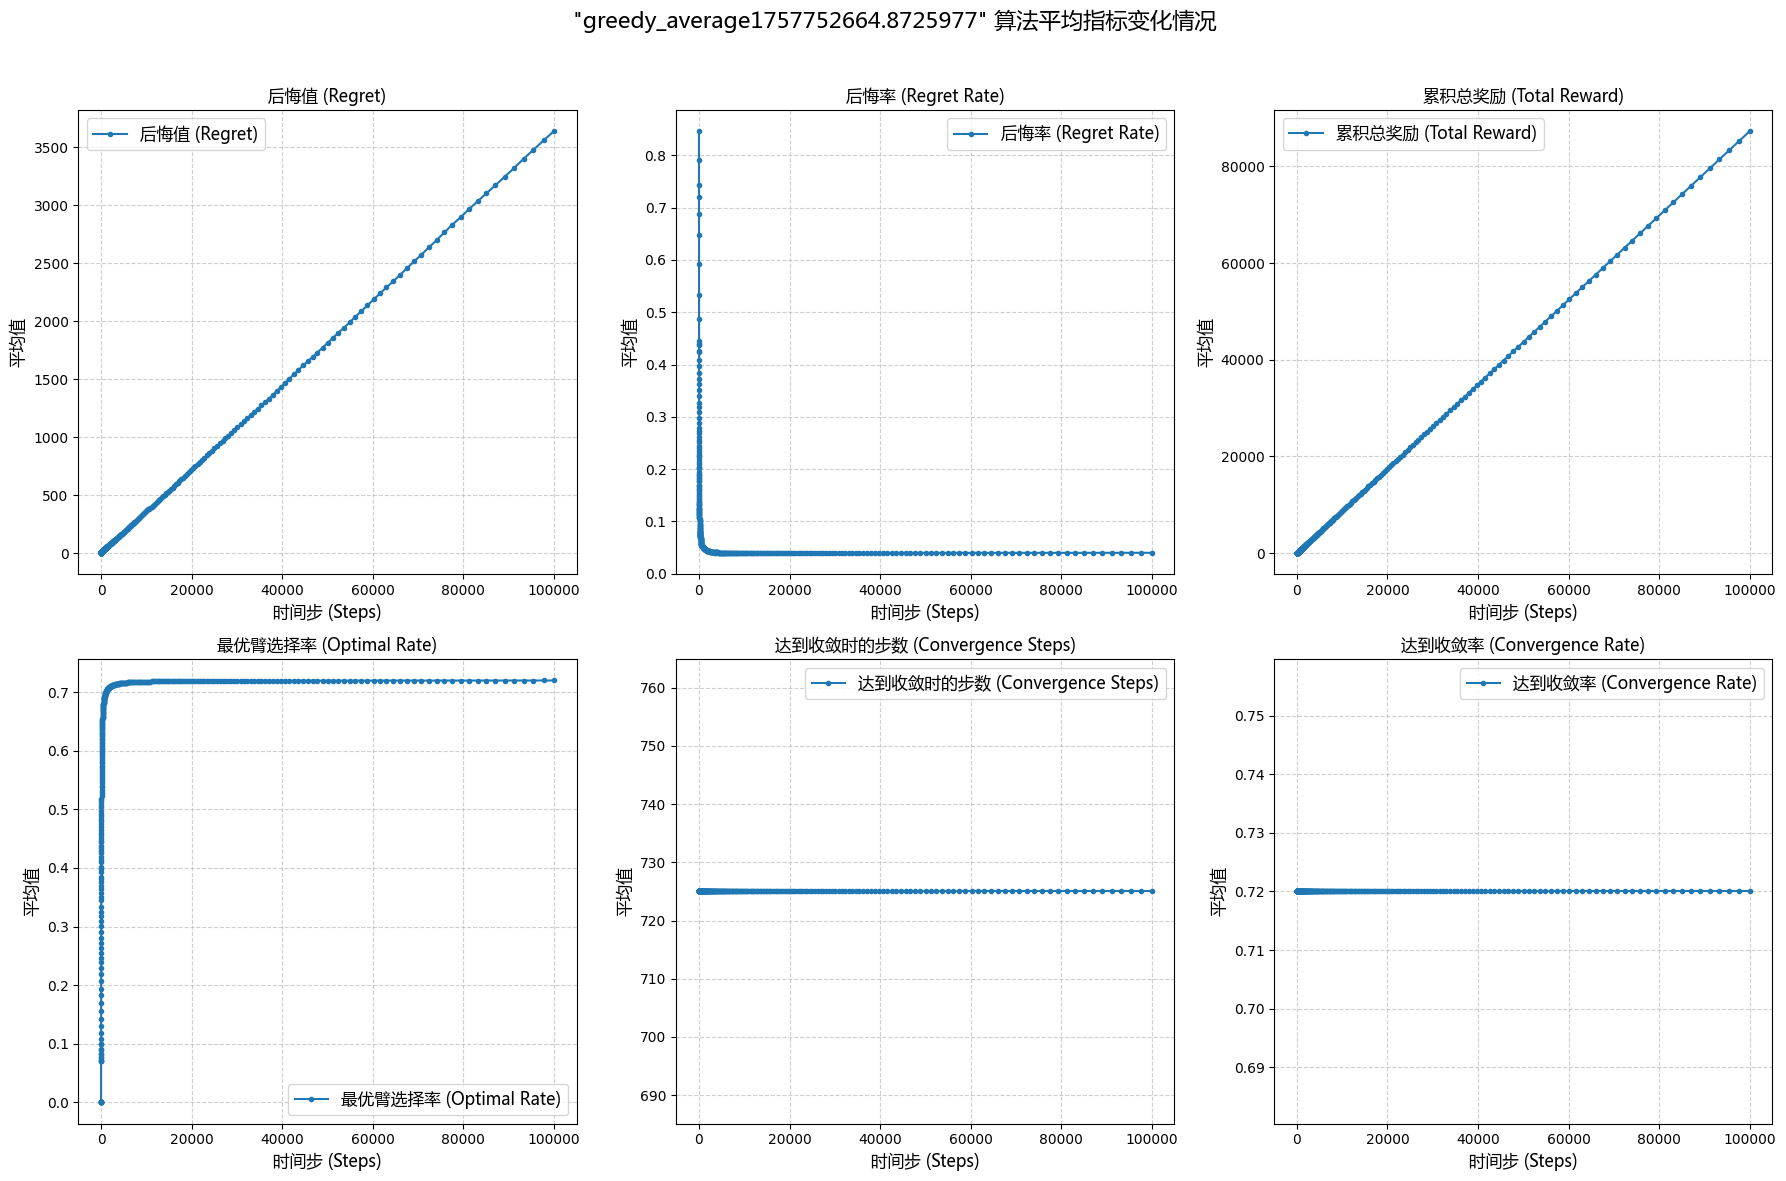

✅ 图表已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/greedy_average1757752664.8725977_T=100000_K=10_Q_0=1.png
✅ 实验结果数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/greedy_average1757752664.8725977_T=100000_K=10_Q_0=1.json
✅ 过程数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/greedy_average1757752664.8725977_T=100000_K=10_Q_0=1process.json


22856

In [6]:
run_id = get_run_id(greedy_average.__name__)
file_name: Path =EXPERIMENT_DATA_DIR / f"{run_id}_T={STEPS}_K={MACHINE_COUNT}_Q_0={OPTIMISTIC_TIMES}.png"
process_logger = ProcessDataLogger(
    run_id=run_id,
    total_steps=STEPS,
    grid_size=GRID_SIZE,
)

agents, reward, metrics = batch_train(
    count=COUNT,
    agent_factory=create_greedy_agent,
    env=ENV,
    epsilon_config=EPSILON_CONFIG,
    steps=STEPS,
    seed=SEED,
    optimistic_init=ENABLE_OPTIMISTIC,
    optimistic_times=OPTIMISTIC_TIMES,
    convergence_threshold=CONVERGENCE_THRESHOLD,
    convergence_min_steps=CONVERGENCE_MIN_STEPS,
    process_logger=process_logger
)
print(metrics)
print(reward)

plot_metrics_history(agents, run_id, file_name)
save_experiment_data(reward, metrics, file_name)
process_logger.save(file_name.with_stem(file_name.stem + "process"), total_steps=STEPS)
dump = process_logger.export(total_steps=STEPS)
keys = list(dump.points[0].data.keys())

del agents, reward, metrics, process_logger, dump
gc.collect()

## epsilon-贪婪算法

达到收敛时的步数: 1540
达到收敛时的步数: 11570
达到收敛时的步数: 3580
达到收敛时的步数: 3250
达到收敛时的步数: 79960
达到收敛时的步数: 1420
达到收敛时的步数: 4280
达到收敛时的步数: 58400
达到收敛时的步数: 73380
达到收敛时的步数: 53440
达到收敛时的步数: 2400
达到收敛时的步数: 4890
达到收敛时的步数: 1000
达到收敛时的步数: 1380
达到收敛时的步数: 37370
达到收敛时的步数: 94410
达到收敛时的步数: 1700
达到收敛时的步数: 10540
达到收敛时的步数: 4940
达到收敛时的步数: 15340
达到收敛时的步数: 2420
达到收敛时的步数: 13390
达到收敛时的步数: 1000
达到收敛时的步数: 1350
达到收敛时的步数: 3330
达到收敛时的步数: 87080
达到收敛时的步数: 2460
达到收敛时的步数: 3040
达到收敛时的步数: 4240
达到收敛时的步数: 3040
达到收敛时的步数: 10610
达到收敛时的步数: 3860
达到收敛时的步数: 2440
达到收敛时的步数: 1060
达到收敛时的步数: 5450
达到收敛时的步数: 1080
达到收敛时的步数: 1180
达到收敛时的步数: 14980
达到收敛时的步数: 1780
达到收敛时的步数: 2690
达到收敛时的步数: 1430
达到收敛时的步数: 3840
达到收敛时的步数: 2610
达到收敛时的步数: 43910
达到收敛时的步数: 12400
avg_regret=4134.030909090911 avg_regret_rate=0.04547434000000003 avg_total_reward=86775.06 avg_optimal_rate=0.9061375999999997 avg_convergence_steps=13909.2 avg_convergence_rate=0.9
values=[90.08, 182.58, 271.5, 362.48, 458.42, 544.8, 642.76, 731.5, 1123.28, 82367.66] counts=[998.52, 1002.92, 999.56, 996.86, 

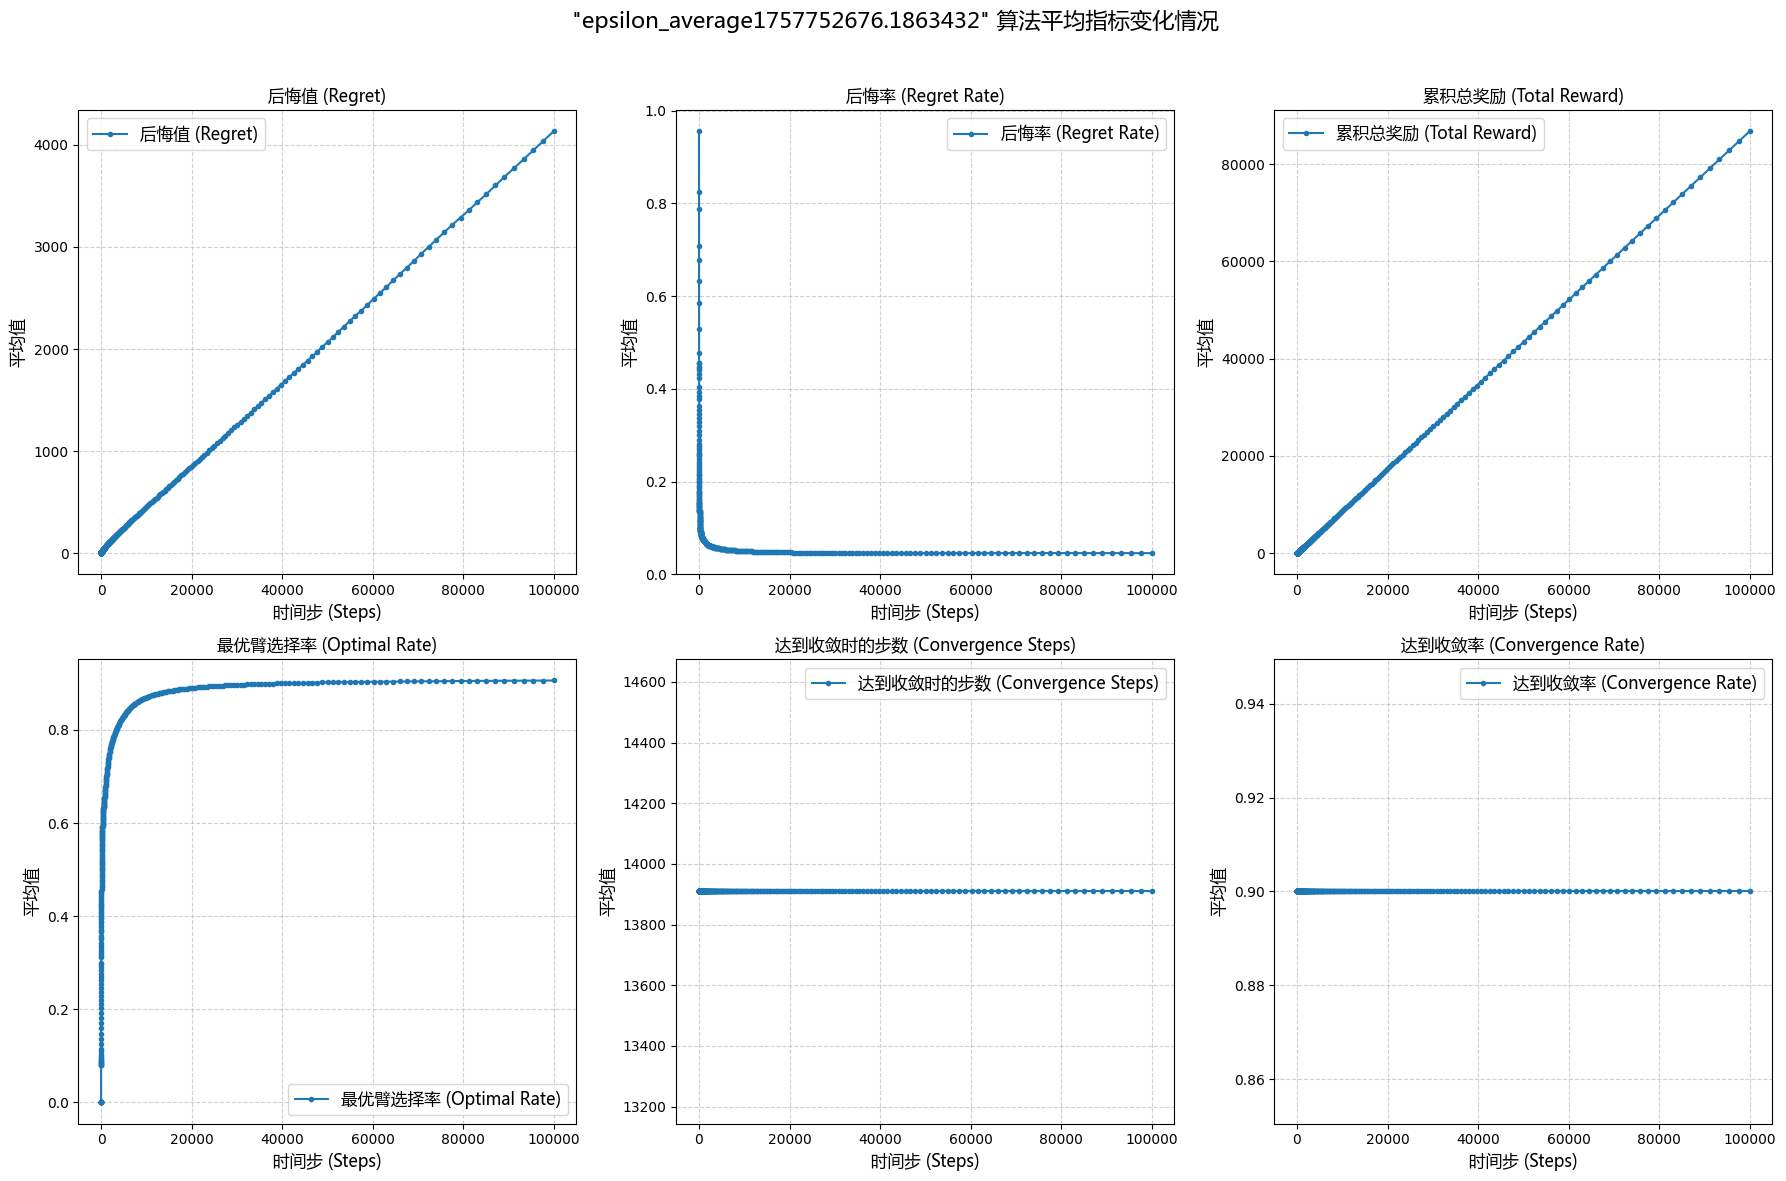

✅ 图表已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/epsilon_average1757752676.1863432_T=100000_K=10_Q_0=1.png
✅ 实验结果数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/epsilon_average1757752676.1863432_T=100000_K=10_Q_0=1.json
✅ 过程数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/epsilon_average1757752676.1863432_T=100000_K=10_Q_0=1process.json


21482

In [7]:
run_id = get_run_id(epsilon_average.__name__)
file_name: Path =EXPERIMENT_DATA_DIR / f"{run_id}_T={STEPS}_K={MACHINE_COUNT}_Q_0={OPTIMISTIC_TIMES}.png"
process_logger = ProcessDataLogger(
    run_id=run_id,
    total_steps=STEPS,
    grid_size=GRID_SIZE,
)

agents, reward, metrics = batch_train(
    count=COUNT,
    agent_factory=create_epsilon_agent,
    env=ENV,
    epsilon_config=EPSILON_CONFIG,
    steps=STEPS,
    seed=SEED,
    optimistic_init=ENABLE_OPTIMISTIC,
    optimistic_times=OPTIMISTIC_TIMES,
    convergence_threshold=CONVERGENCE_THRESHOLD,
    convergence_min_steps=CONVERGENCE_MIN_STEPS,
    process_logger=process_logger,
)
print(metrics)
print(reward)

plot_metrics_history(agents, run_id, file_name)
save_experiment_data(reward, metrics, file_name)
process_logger.save(file_name.with_stem(file_name.stem + "process"), total_steps=STEPS)
dump = process_logger.export(total_steps=STEPS)
keys = list(dump.points[0].data.keys())

del agents, reward, metrics, process_logger, dump
gc.collect()

## 退火 epsilon 贪婪算法

达到收敛时的步数: 2470
达到收敛时的步数: 1950
达到收敛时的步数: 2200
达到收敛时的步数: 1950
达到收敛时的步数: 2050
达到收敛时的步数: 2030
达到收敛时的步数: 2060
达到收敛时的步数: 2110
达到收敛时的步数: 2280
达到收敛时的步数: 1990
达到收敛时的步数: 2180
达到收敛时的步数: 2920
达到收敛时的步数: 1970
达到收敛时的步数: 2000
达到收敛时的步数: 2100
达到收敛时的步数: 1890
达到收敛时的步数: 2220
达到收敛时的步数: 1990
达到收敛时的步数: 1830
达到收敛时的步数: 1940
达到收敛时的步数: 2630
达到收敛时的步数: 2050
达到收敛时的步数: 2180
达到收敛时的步数: 1870
达到收敛时的步数: 2080
达到收敛时的步数: 2150
达到收敛时的步数: 1980
达到收敛时的步数: 1850
达到收敛时的步数: 2090
达到收敛时的步数: 3520
达到收敛时的步数: 2350
达到收敛时的步数: 3150
达到收敛时的步数: 2060
达到收敛时的步数: 5490
达到收敛时的步数: 2940
达到收敛时的步数: 2060
达到收敛时的步数: 1950
达到收敛时的步数: 2010
达到收敛时的步数: 1980
达到收敛时的步数: 2170
达到收敛时的步数: 2060
达到收敛时的步数: 1960
达到收敛时的步数: 1950
达到收敛时的步数: 2050
达到收敛时的步数: 2030
达到收敛时的步数: 2070
达到收敛时的步数: 1950
达到收敛时的步数: 3350
avg_regret=549.8909090909117 avg_regret_rate=0.006048800000000033 avg_total_reward=90359.2 avg_optimal_rate=0.9812238 avg_convergence_steps=2162.2 avg_convergence_rate=0.96
values=[11.04, 22.12, 33.34, 43.38, 55.36, 64.92, 77.94, 90.18, 747.54, 89213.38] counts=[119.54, 119.4, 12

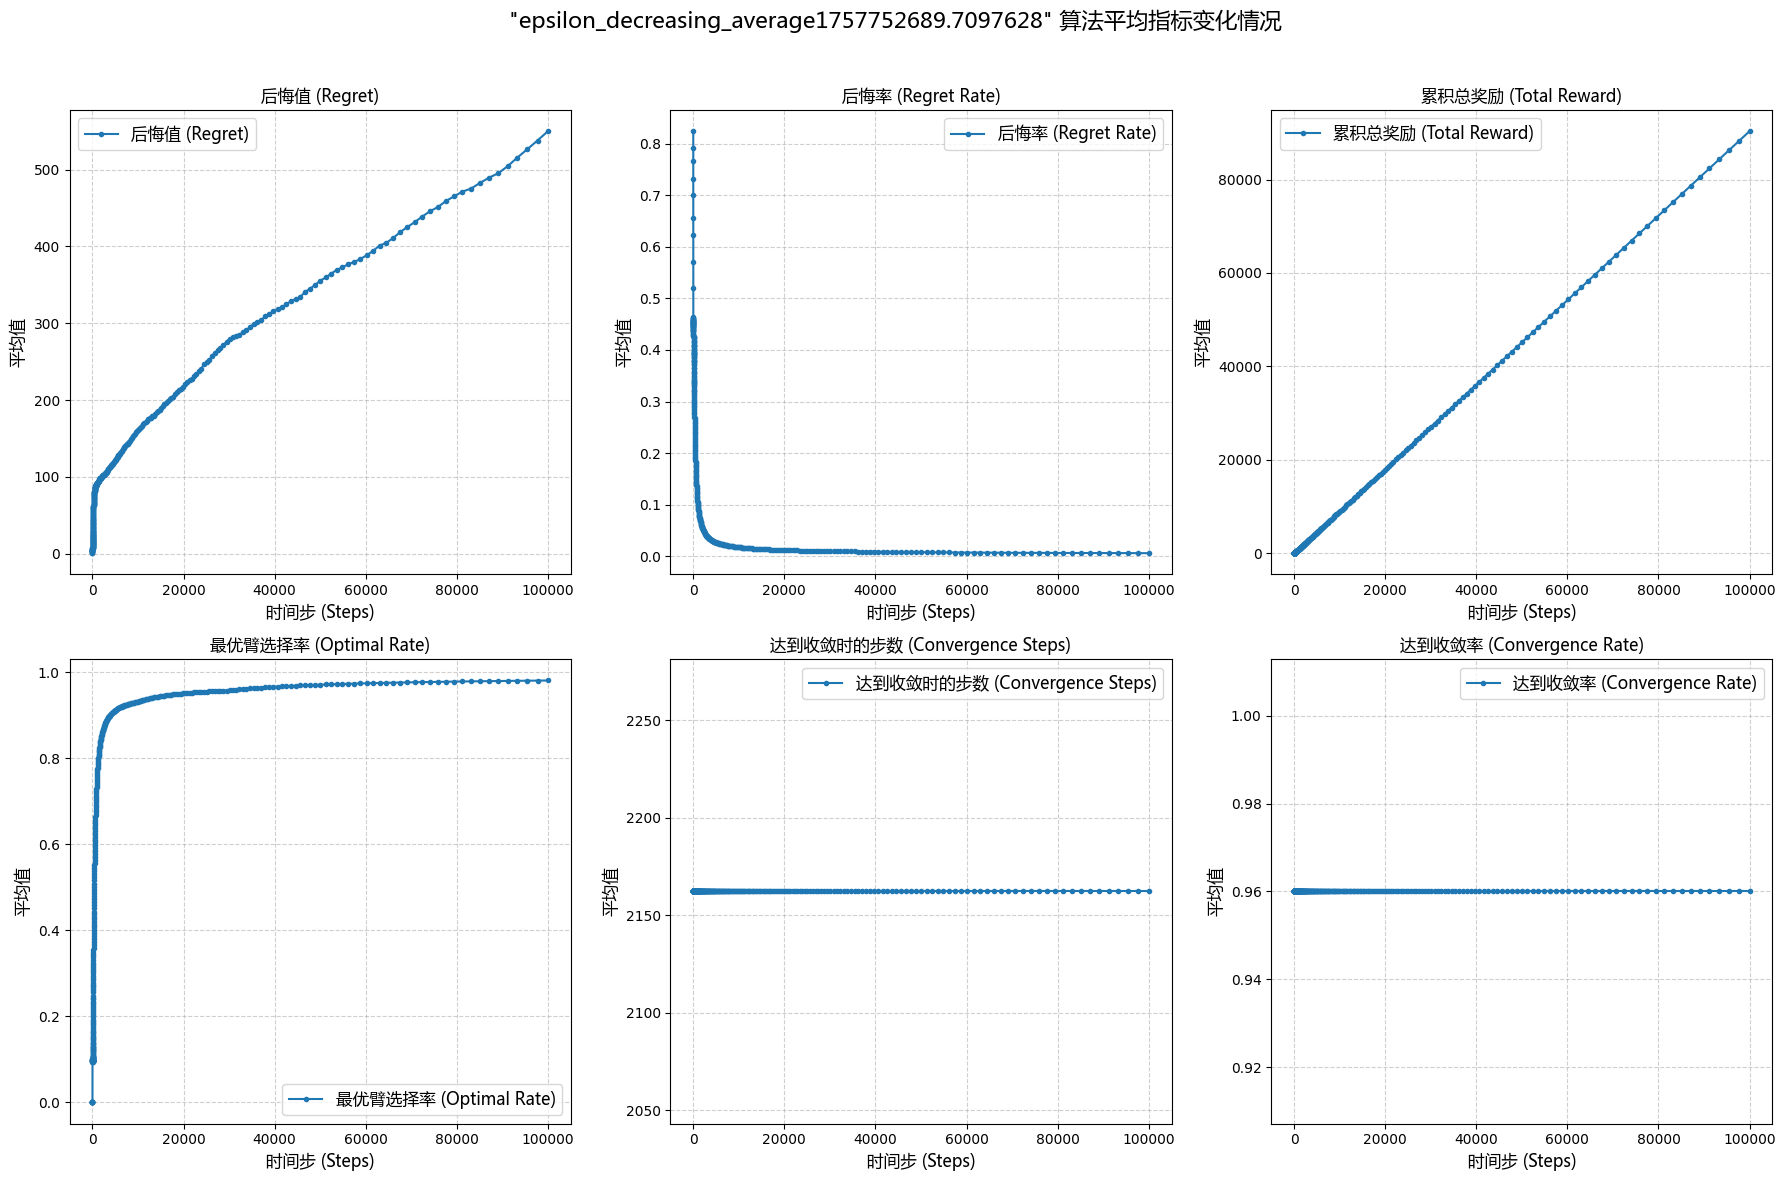

✅ 图表已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/epsilon_decreasing_average1757752689.7097628_T=100000_K=10_Q_0=1.png
✅ 实验结果数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/epsilon_decreasing_average1757752689.7097628_T=100000_K=10_Q_0=1.json
✅ 过程数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/epsilon_decreasing_average1757752689.7097628_T=100000_K=10_Q_0=1process.json


21725

In [8]:
run_id = get_run_id(epsilon_decreasing_average.__name__)
file_name: Path =EXPERIMENT_DATA_DIR / f"{run_id}_T={STEPS}_K={MACHINE_COUNT}_Q_0={OPTIMISTIC_TIMES}.png"
process_logger = ProcessDataLogger(
    run_id=run_id,
    total_steps=STEPS,
    grid_size=GRID_SIZE,
)

agents, reward, metrics = batch_train(
    count=COUNT,
    agent_factory=create_decreasing_agent,
    env=ENV,
    epsilon_config=EPSILON_CONFIG,
    steps=STEPS,
    seed=SEED,
    optimistic_init=ENABLE_OPTIMISTIC,
    optimistic_times=OPTIMISTIC_TIMES,
    convergence_threshold=CONVERGENCE_THRESHOLD,
    convergence_min_steps=CONVERGENCE_MIN_STEPS,
    process_logger=process_logger,
)
print(metrics)
print(reward)

plot_metrics_history(agents, run_id, file_name)
save_experiment_data(reward, metrics, file_name)
process_logger.save(file_name.with_stem(file_name.stem + "process"), total_steps=STEPS)
dump = process_logger.export(total_steps=STEPS)
keys = list(dump.points[0].data.keys())

del agents, reward, metrics, process_logger, dump
gc.collect()

## UCB1算法

达到收敛时的步数: 25060
达到收敛时的步数: 21370
达到收敛时的步数: 19470
达到收敛时的步数: 21340
达到收敛时的步数: 22620
达到收敛时的步数: 23140
达到收敛时的步数: 33480
达到收敛时的步数: 19260
达到收敛时的步数: 20340
达到收敛时的步数: 21780
达到收敛时的步数: 21760
达到收敛时的步数: 24440
达到收敛时的步数: 24560
达到收敛时的步数: 19140
达到收敛时的步数: 23730
达到收敛时的步数: 25160
达到收敛时的步数: 25460
达到收敛时的步数: 25920
达到收敛时的步数: 26440
达到收敛时的步数: 27120
达到收敛时的步数: 19280
达到收敛时的步数: 23430
达到收敛时的步数: 27360
达到收敛时的步数: 21630
达到收敛时的步数: 25720
达到收敛时的步数: 23350
达到收敛时的步数: 20520
达到收敛时的步数: 29930
达到收敛时的步数: 23590
达到收敛时的步数: 30960
达到收敛时的步数: 25340
达到收敛时的步数: 29280
达到收敛时的步数: 25580
达到收敛时的步数: 25290
达到收敛时的步数: 20090
达到收敛时的步数: 25410
达到收敛时的步数: 21040
达到收敛时的步数: 27480
达到收敛时的步数: 22100
达到收敛时的步数: 33550
达到收敛时的步数: 23950
达到收敛时的步数: 17310
达到收敛时的步数: 20540
达到收敛时的步数: 30510
达到收敛时的步数: 25750
达到收敛时的步数: 21670
达到收敛时的步数: 21670
达到收敛时的步数: 19740
达到收敛时的步数: 20960
达到收敛时的步数: 25640
avg_regret=596.4909090909117 avg_regret_rate=0.006561400000000028 avg_total_reward=90312.6 avg_optimal_rate=0.9666944000000001 avg_convergence_steps=24005.2 avg_convergence_rate=1.0
values=[3.2, 8.22,

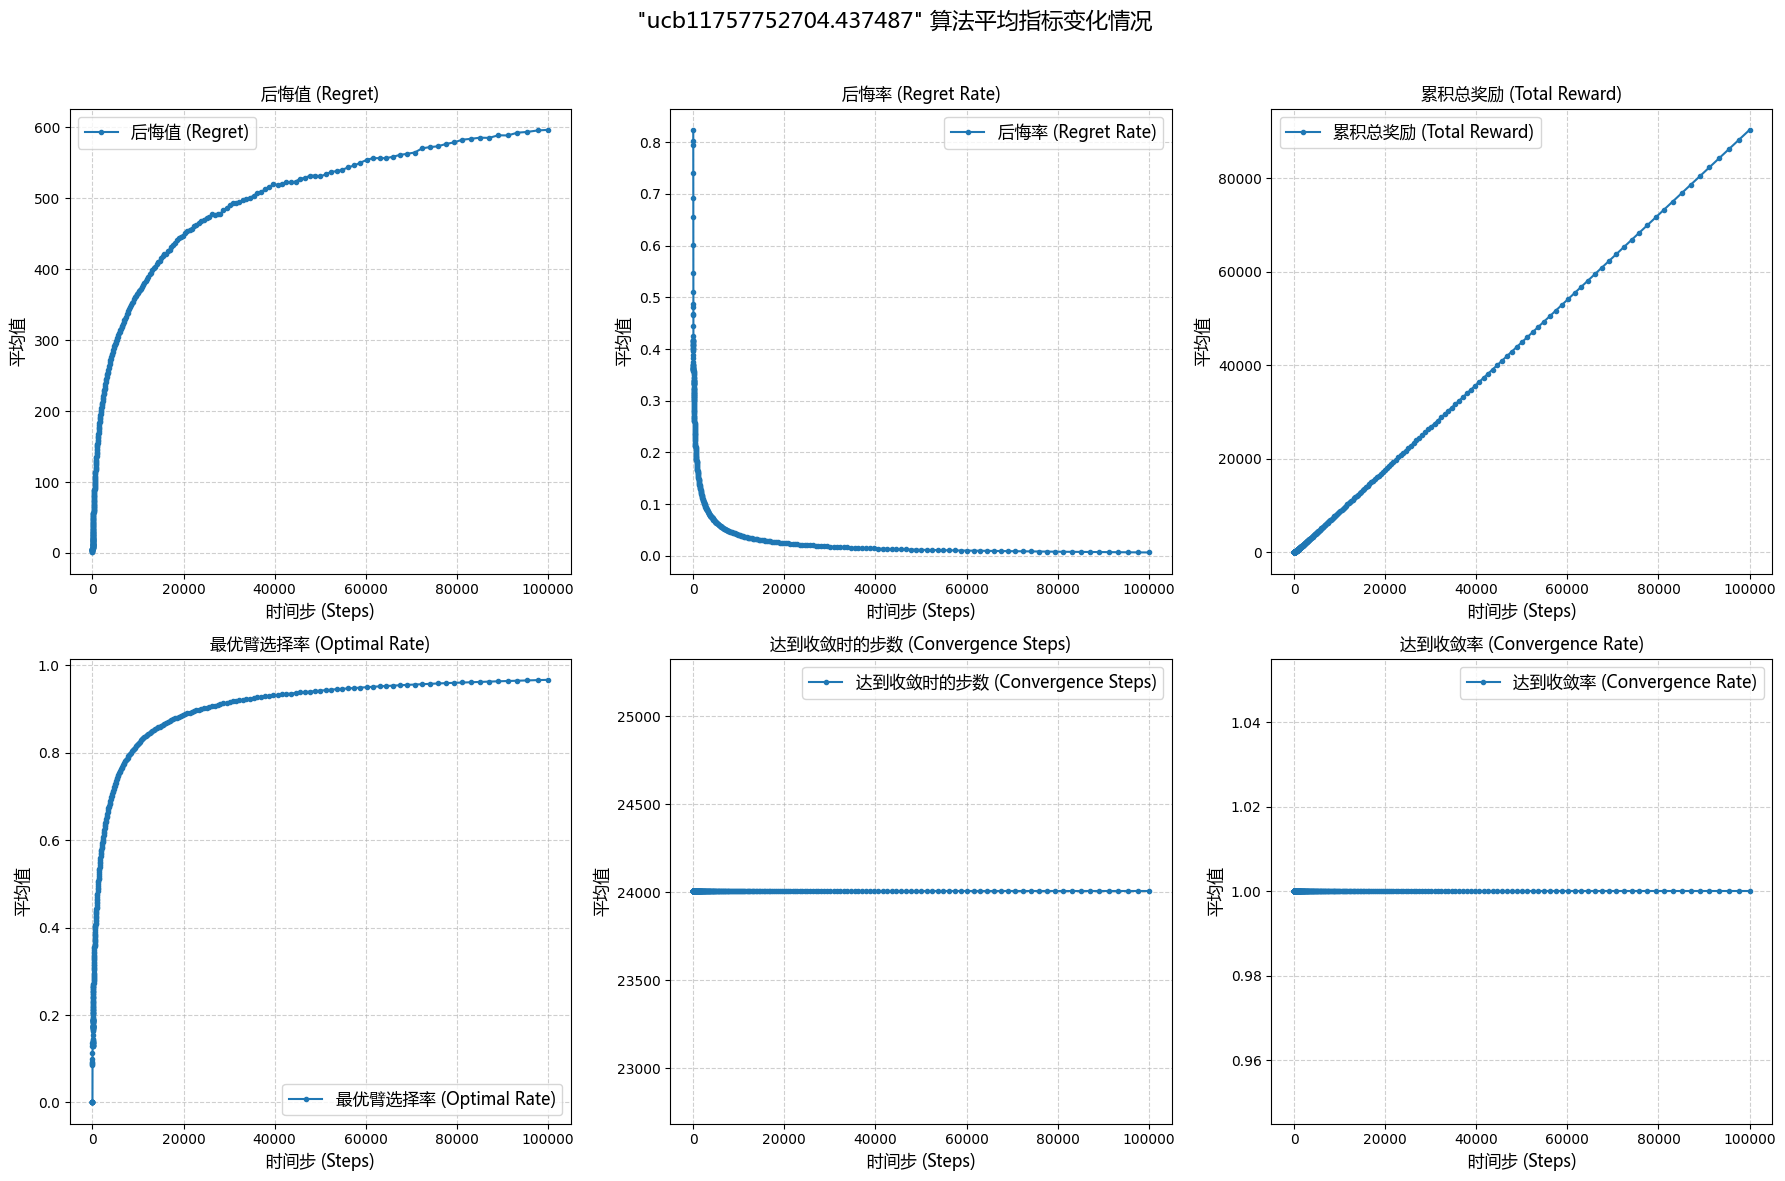

✅ 图表已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/ucb11757752704.437487_T=100000_K=10_Q_0=1.png
✅ 实验结果数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/ucb11757752704.437487_T=100000_K=10_Q_0=1.json
✅ 过程数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/ucb11757752704.437487_T=100000_K=10_Q_0=1process.json


21849

In [9]:
run_id = get_run_id(ucb1.__name__)
file_name: Path =EXPERIMENT_DATA_DIR / f"{run_id}_T={STEPS}_K={MACHINE_COUNT}_Q_0={OPTIMISTIC_TIMES}.png"
process_logger = ProcessDataLogger(
    run_id=run_id,
    total_steps=STEPS,
    grid_size=GRID_SIZE,
)

agents, reward, metrics = batch_train(
    count=COUNT,
    agent_factory=create_ucb1_agent,
    env=ENV,
    steps=STEPS,
    seed=SEED,
    convergence_threshold=CONVERGENCE_THRESHOLD,
    convergence_min_steps=CONVERGENCE_MIN_STEPS,
    process_logger=process_logger,
)
print(metrics)
print(reward)

plot_metrics_history(agents, run_id, file_name)
save_experiment_data(reward, metrics, file_name)
process_logger.save(file_name.with_stem(file_name.stem + "process"), total_steps=STEPS)
dump = process_logger.export(total_steps=STEPS)
keys = list(dump.points[0].data.keys())

del agents, reward, metrics, process_logger, dump
gc.collect()